In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

tita = pd.read_csv(r'C:\Users\kamil\Desktop\python course stuff\titanic-passengers.csv',
                   sep=';',)

tita.head()
tita.info()
tita.describe()

tita.isna().sum()/len(tita)*100
tita['Embarked'].value_counts().idxmax()

tita.drop('Cabin', axis=1, inplace=True)
tita.Age=tita.Age.fillna(tita.Age.mean())
tita.Embarked=tita.Embarked.fillna('S')

conv_dic= {"Sex":{"female":0, "male":1},"Survived":{"No":0,"Yes":1}}
tita.replace(conv_dic, inplace=True)
tita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S


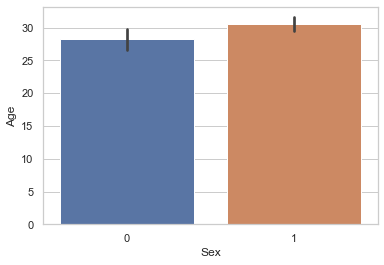

In [30]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Sex", y="Age", data=tita)

C:\Users\kamil\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


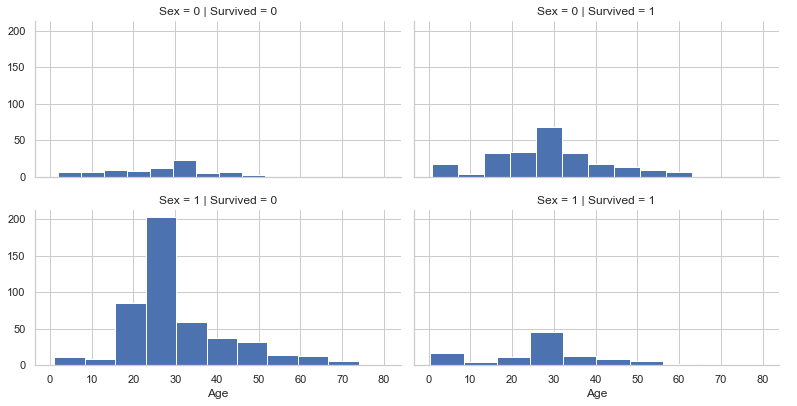

In [31]:
grid = sns.FacetGrid(tita, row="Sex", col="Survived", size=2.9, aspect=1.9)
grid.map(plt.hist, 'Age')
grid.add_legend()

C:\Users\kamil\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


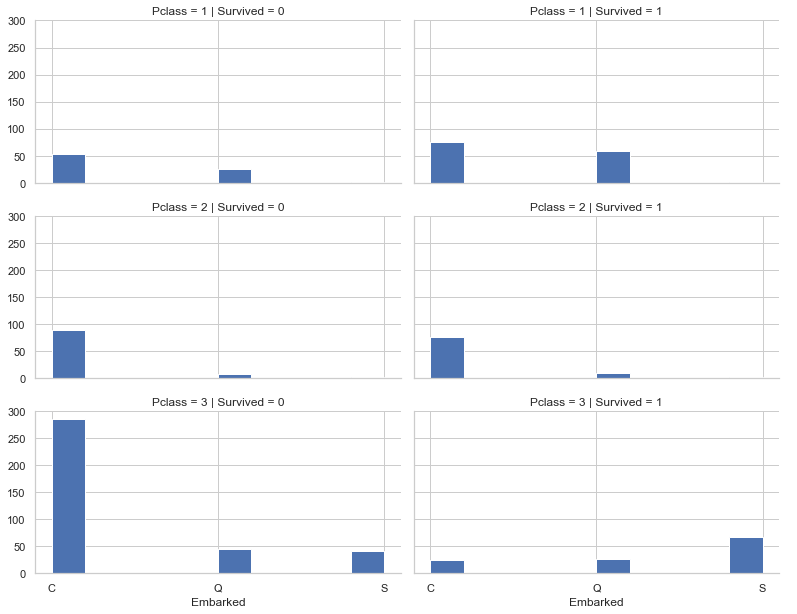

In [32]:
grid = sns.FacetGrid(tita, row="Pclass", col="Survived", size=2.9, aspect=1.9)
grid.map(plt.hist, 'Embarked')
grid.add_legend()

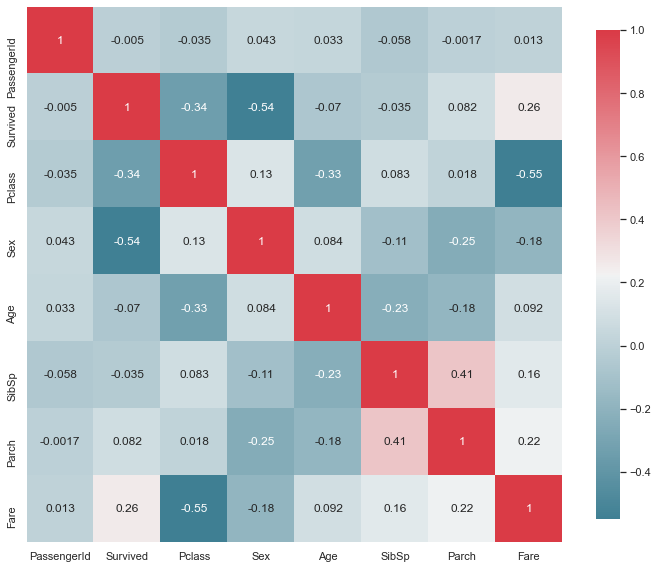

In [33]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
    
#This fonction calculates the correlation betwen two features and gives a value between -1 and 1, a big value means
#that the increase of a feature increases the other, a small value is the opposite, and a value of 0 means no correlation.
    
plot_correlation_map(tita)

In [35]:
tita[["Pclass", "Survived"]].groupby("Survived").mean()

,Pclass
Survived,
0,2.531876
1,1.950292


In [36]:
tita

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",1,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",0,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,0,0,349215,7.8958,S


In [4]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

titles = Title_Dictionary.keys()
for i, row in tita.iterrows():
    name = row["Name"]
    lis = name.split(" ")
    for title in titles:
        for l in lis:
            newTitle = title+"."
            if newTitle == l:
                tita.loc[i,"Title"] = title
tita.replace(Title_Dictionary,inplace=True)
tita.drop('Name', axis=1, inplace=True)
tita

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,343,0,2,1,28.000000,0,0,248740,13.0000,S,Mrs
1,76,0,3,1,25.000000,0,0,348123,7.6500,S,Mrs
2,641,0,3,1,20.000000,0,0,350050,7.8542,S,Mrs
3,568,0,3,0,29.000000,0,4,349909,21.0750,S,Mrs
4,672,0,1,1,31.000000,1,0,F.C. 12750,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,1,22.000000,0,0,2669,7.2292,C,Mrs
888,535,0,3,0,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,1,29.699118,0,0,349215,7.8958,S,Mrs
